# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dirname = '/content/drive/MyDrive/Colab_Notebooks/Thesis/'
cleanedData_01 = pd.read_csv(dirname + 'cleanedData_01.csv')
cleanedData_01.head()

,iid,gender,pid,match,samerace,age_o,age,field_cd,undergra,imprace,...,movies,concerts,music,shopping,yoga,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,1,0,11.0,0,0,27.0,21.0,1,NaN,2.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
1,1,0,12.0,0,0,22.0,21.0,1,NaN,2.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
2,1,0,13.0,1,1,22.0,21.0,1,NaN,2.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
3,1,0,14.0,1,0,23.0,21.0,1,NaN,2.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
4,1,0,15.0,1,0,24.0,21.0,1,NaN,2.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0


In [4]:
EDA = cleanedData_01[['iid', 'gender', 'age','field_cd','undergra', 'from','income','career_c'
                      ,'sports','tvsports','exercise','dining','museums','art','hiking','gaming'
                      ,'clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga'
                      ,'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1','amb3_1']].drop_duplicates()
print(EDA.info())

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, 0 to 8356
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       551 non-null    int64  
 1   gender    551 non-null    int64  
 2   age       543 non-null    float64
 3   field_cd  551 non-null    int64  
 4   undergra  315 non-null    object 
 5   from      544 non-null    object 
 6   income    281 non-null    float64
 7   career_c  551 non-null    int64  
 8   sports    544 non-null    float64
 9   tvsports  544 non-null    float64
 10  exercise  544 non-null    float64
 11  dining    544 non-null    float64
 12  museums   544 non-null    float64
 13  art       544 non-null    float64
 14  hiking    544 non-null    float64
 15  gaming    544 non-null    float64
 16  clubbing  544 non-null    float64
 17  reading   544 non-null    float64
 18  tv        544 non-null    float64
 19  theater   544 non-null    float64
 20  movies    544 non-null    float64
 2

In [5]:
continus_feature = ['gender', 'age','income'
                    ,'sports','tvsports','exercise','dining','museums','art','hiking','gaming'
                    ,'clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga'
                    ,'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1','amb3_1']
category_feature = ['field_cd','career_c']
object_feature = ['from','undergra']
characteristic = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1','amb3_1']
interest = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming'
           ,'clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']

# Boxplot and Distribution

## Continues Features

### Interest & Characteristic

In [6]:
def create_plot(features,name):
    save_dir_name = '/content/drive/MyDrive/Colab_Notebooks/Thesis/EDA_image/'
    # distribution plot
    fig, axes = plt.subplots(figsize=(15, 10))
    sns.set_theme()
    EDA[features].hist(ax=axes)
    plt.suptitle(f'Distribution of {name}', fontsize=16)
    plt.tight_layout()
    save_path = f"{save_dir_name}distribution{name}.png"
    plt.savefig(save_path)
    plt.show()

    # box plot
    fig, axes = plt.subplots(figsize=(15, 10))
    sns.set_theme()
    sns.boxplot(EDA[features], ax=axes)
    fig.suptitle(f'Box Plot of {name}', fontsize=16)
    plt.tight_layout()
    save_path = f"{save_dir_name}boxplot{name}.png"
    plt.savefig(save_path)
    plt.show()


<ipython-input-6-b4adfd38407e>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  EDA[features].hist(ax=axes)


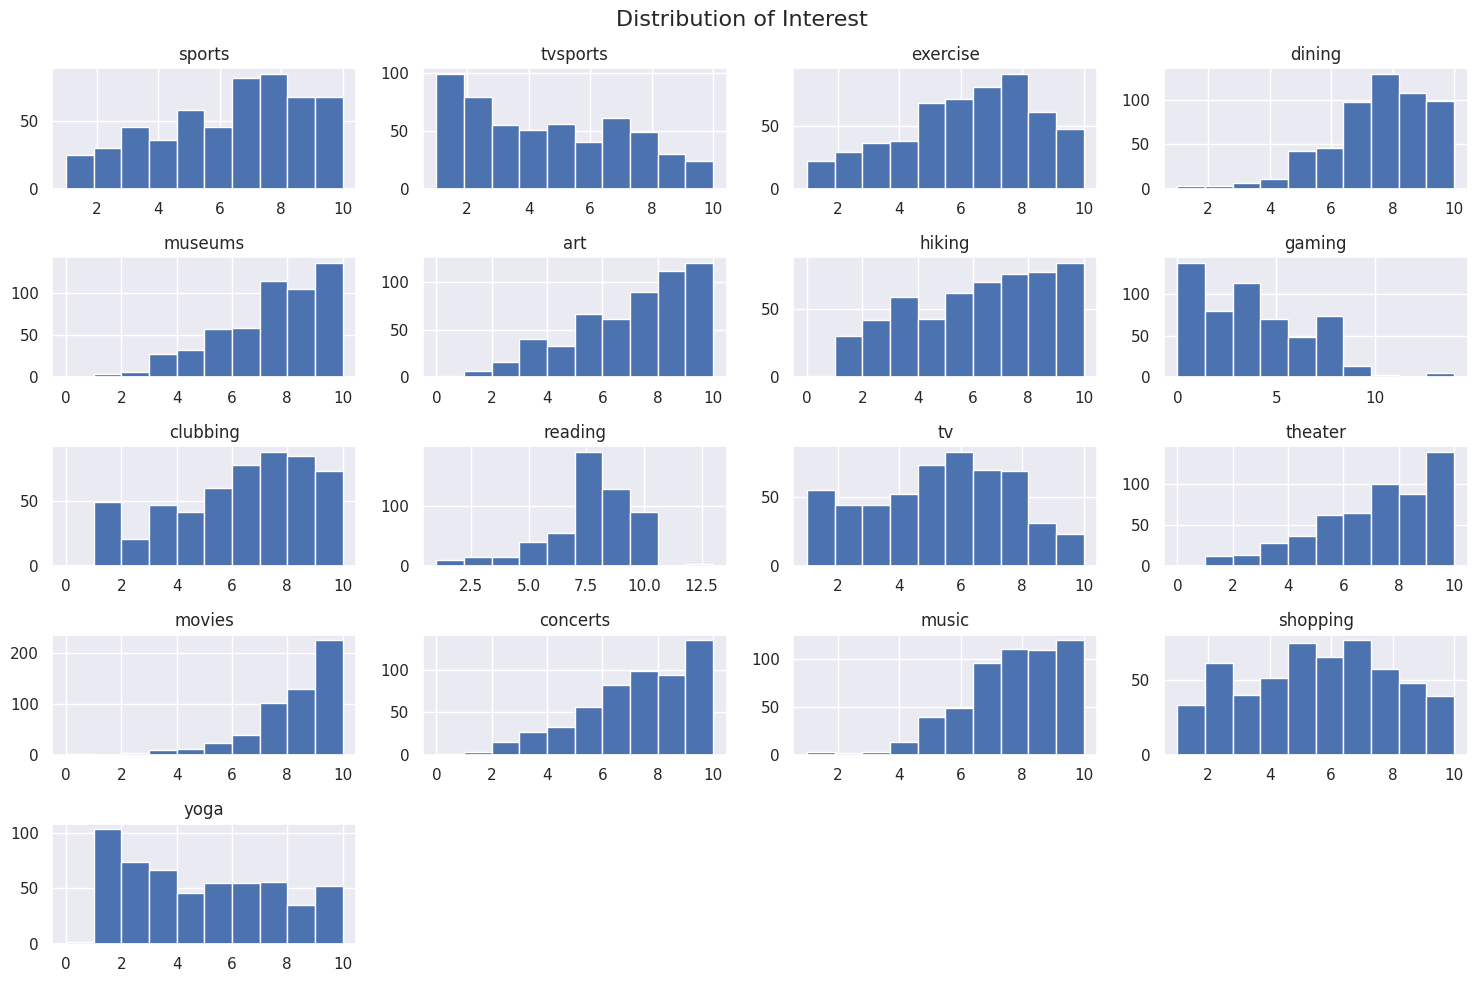

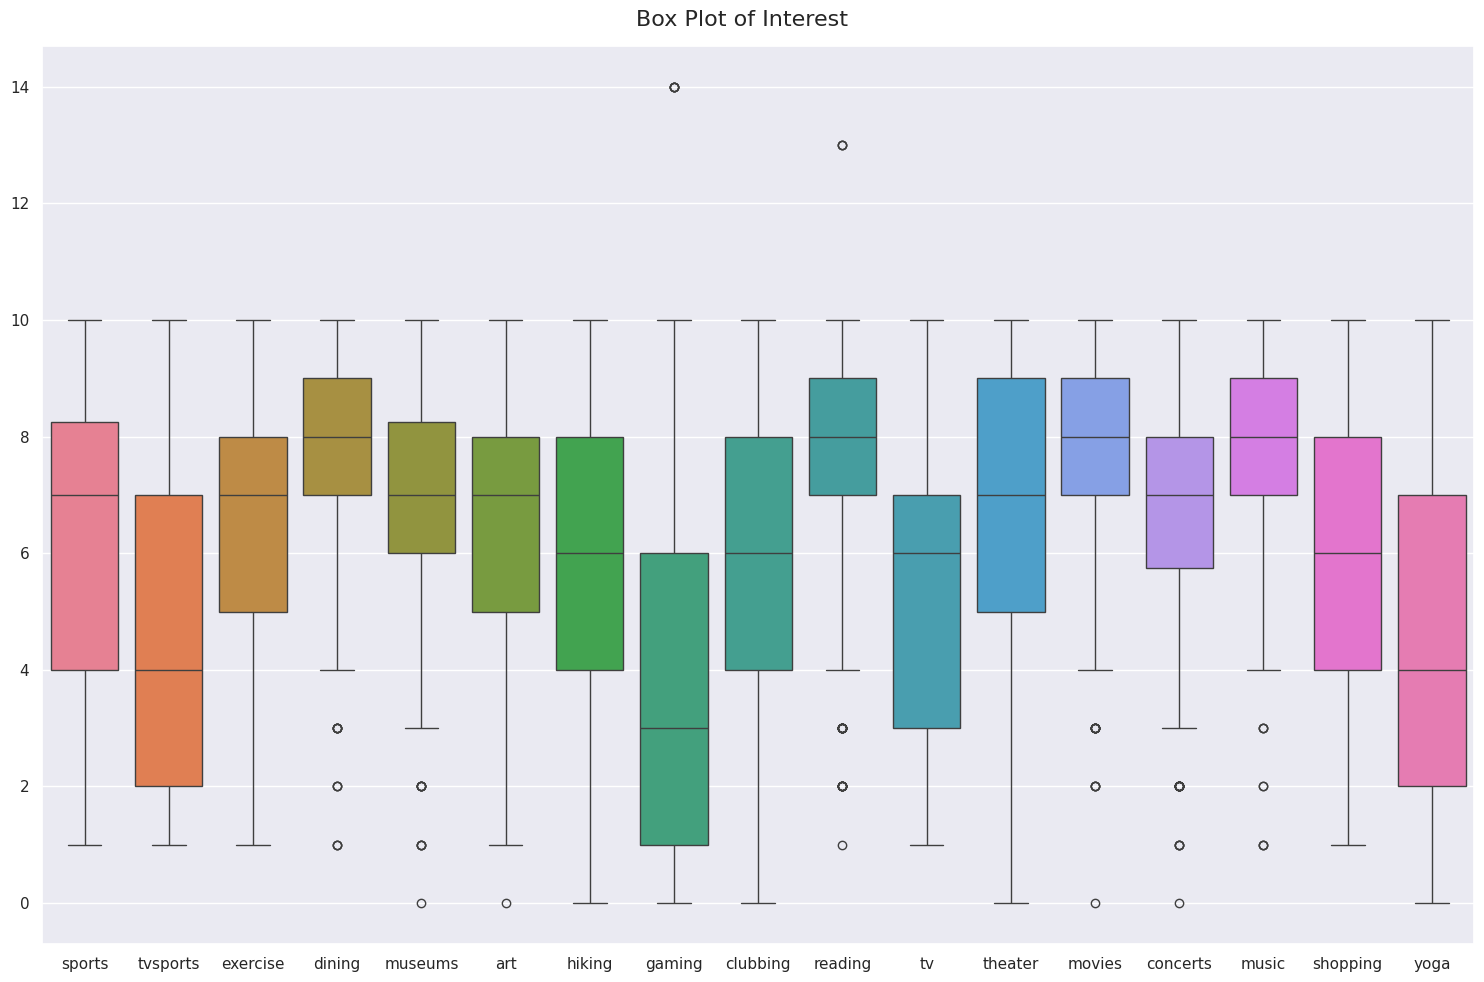

<ipython-input-6-b4adfd38407e>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  EDA[features].hist(ax=axes)


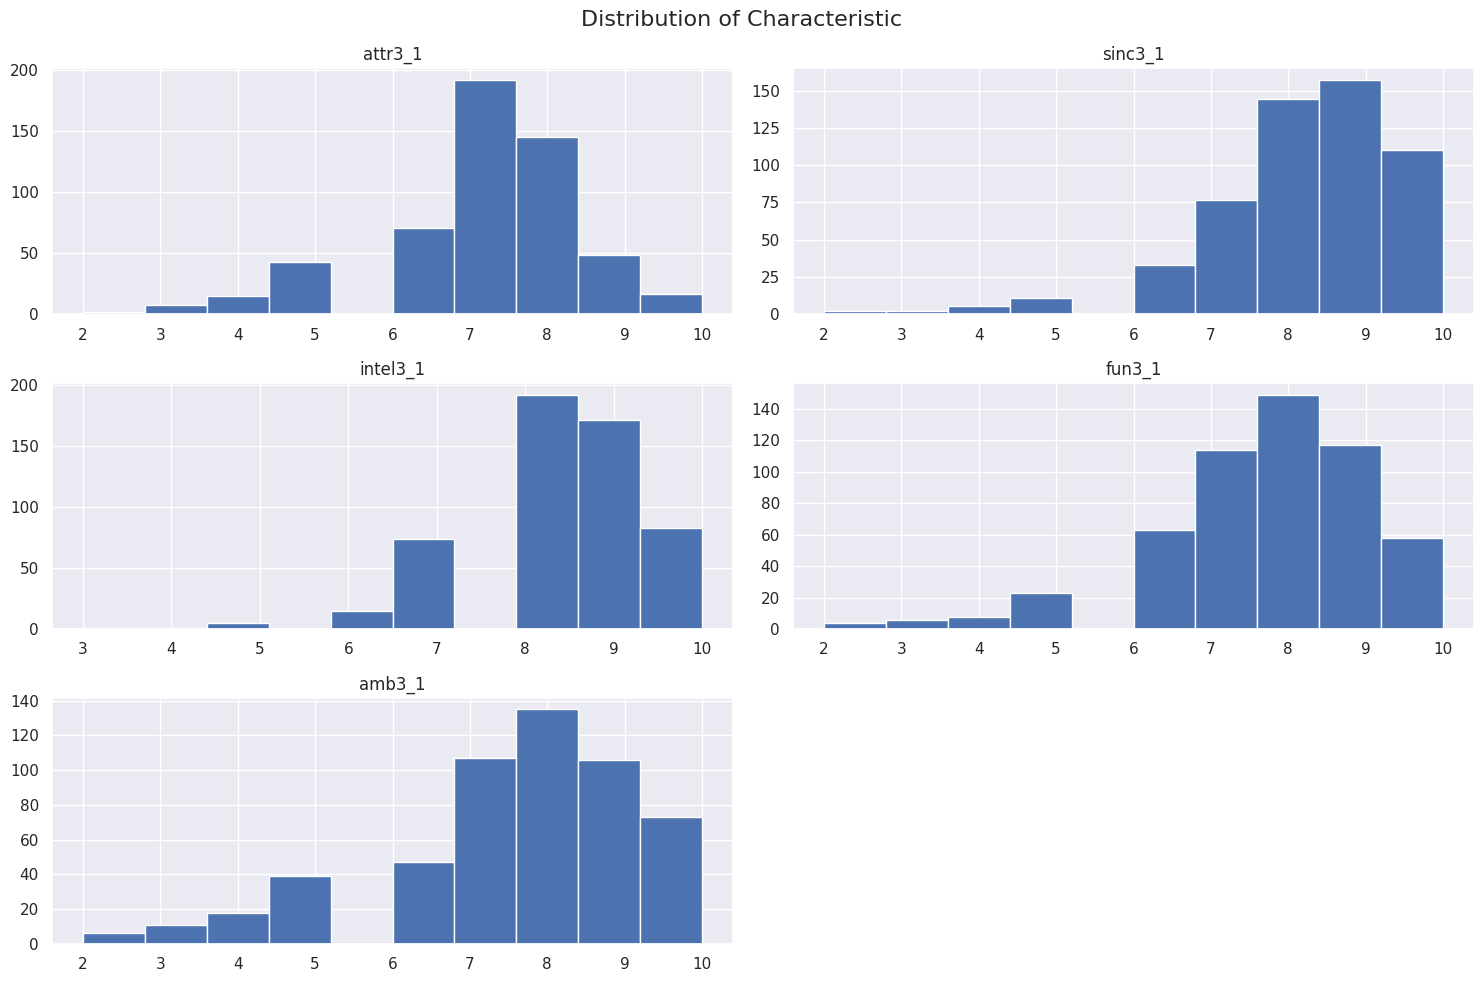

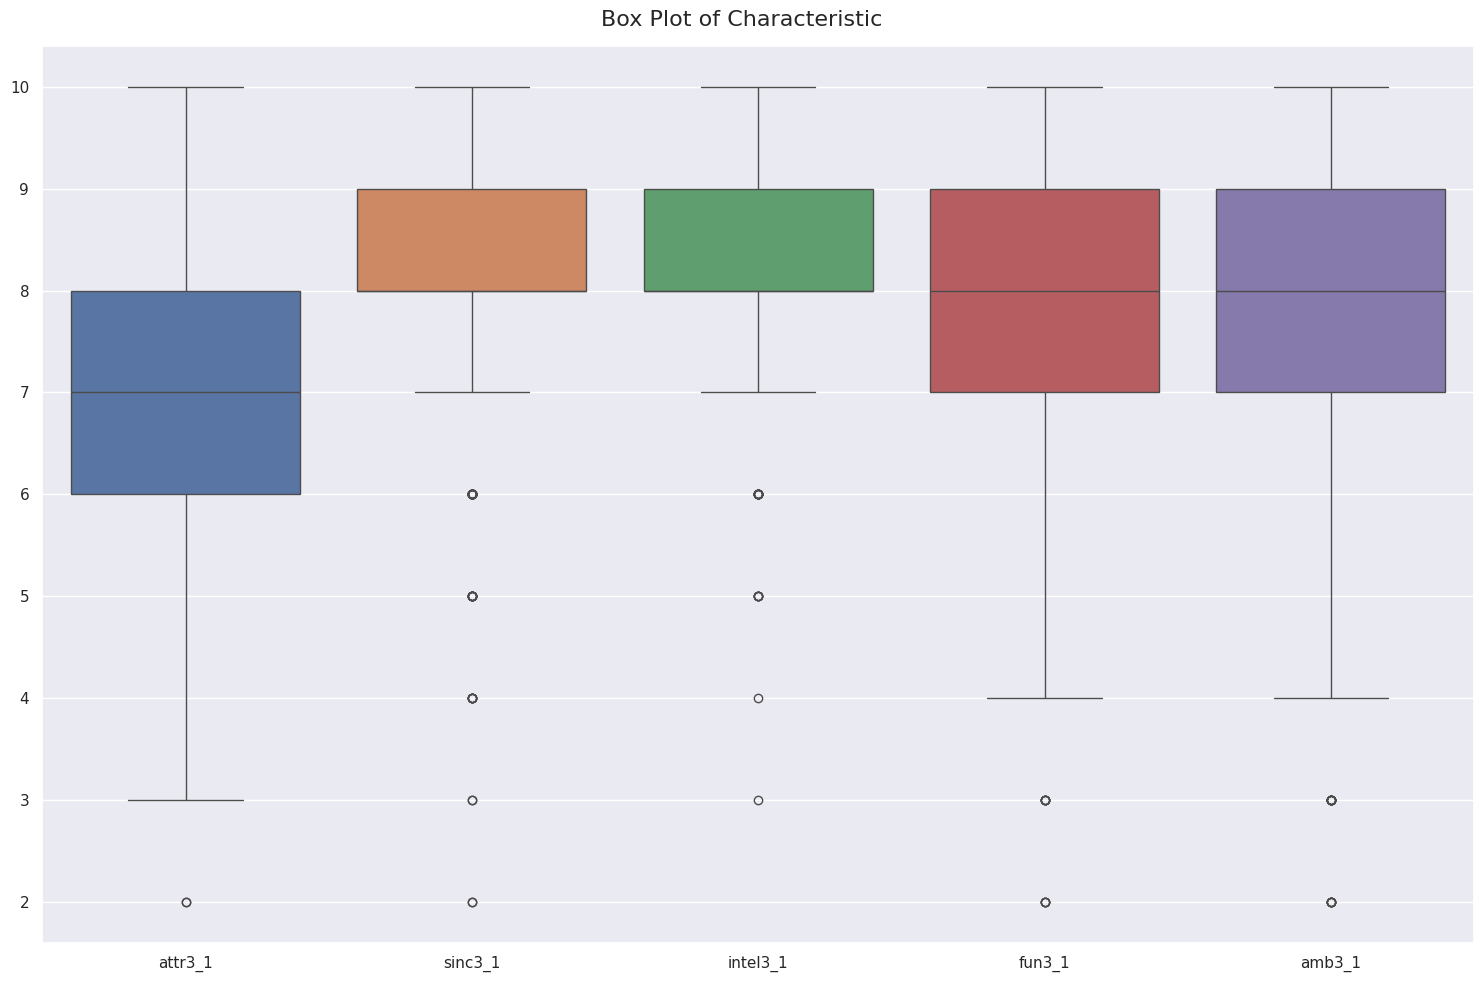

In [7]:
create_plot(interest,'Interest')
create_plot(characteristic, 'Characteristic')

### Others

In [8]:
def plot_distribution_and_boxplot(feature_name):

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.set_theme()
    # Distribution plot
    sns.histplot(EDA[feature_name], ax=ax1)
    ax1.set_title(f'Distribution of {feature_name}')

    # Box plot
    sns.boxplot(EDA[feature_name], ax=ax2)
    ax2.set_title(f'Box Plot of {feature_name}')

    # Add title to the overall figure
    suptitle = f"Distribution and Boxplot of {feature_name}"
    fig.suptitle(suptitle)

    # Save the figure if save_path is provided
    save_dir_name = '/content/drive/MyDrive/Colab_Notebooks/Thesis/EDA_image/'
    save_path = f"{save_dir_name}{feature_name}.png"
    plt.savefig(save_path)
    plt.show()

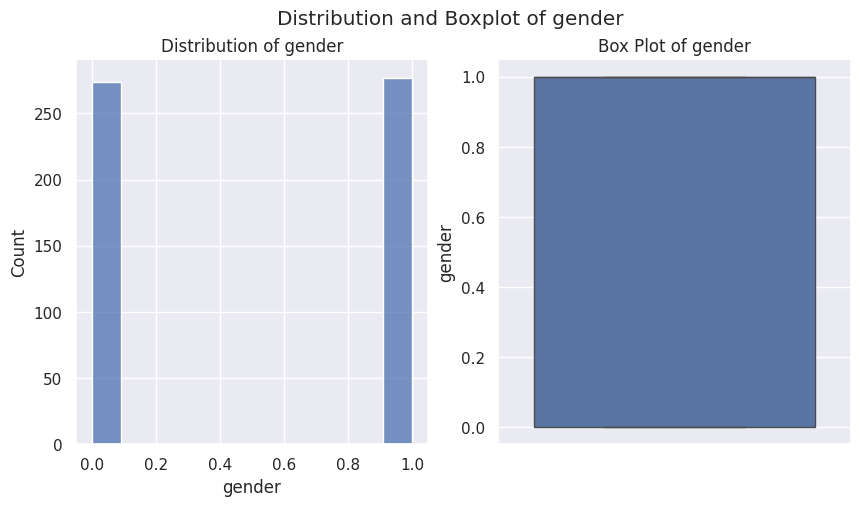

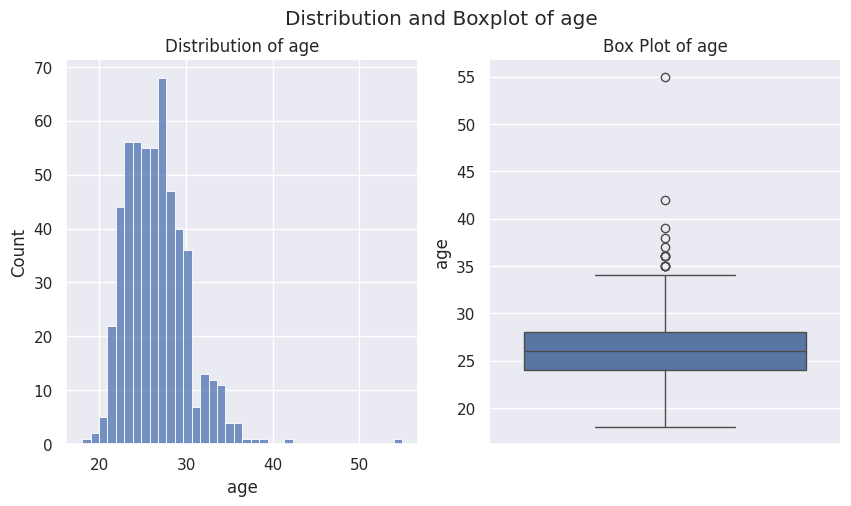

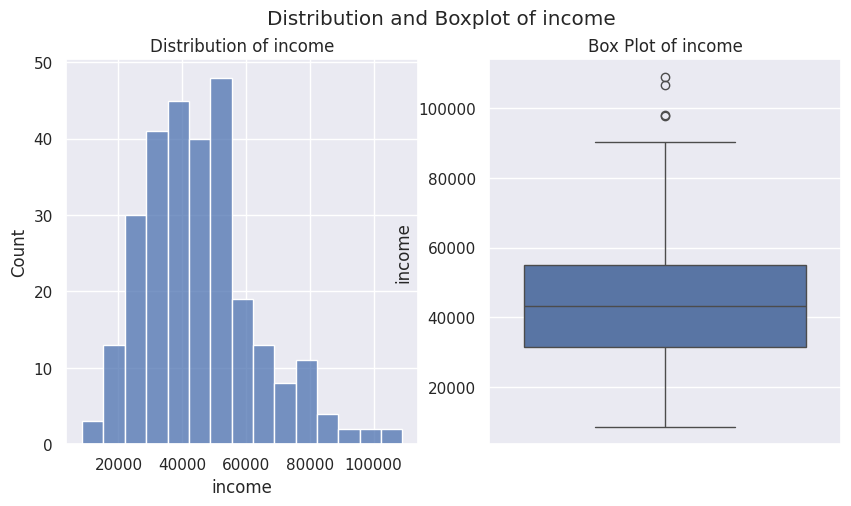

In [9]:
for feature in ['gender', 'age','income']:
    plot_distribution_and_boxplot(feature)

## Categorical Features

In [10]:
field_label = ['NA','Law','Math','Social Science, Psychologist','Medical Science, Pharmaceuticals, and Bio Tech ','Engineering'
              ,'English/Creative Writing/ Journalism','History/Religion/Philosophy','Business/Econ/Finance','Education, Academia','Biological Sciences/Chemistry/Physics'
              ,'Social Work','Undergrad/undecided','Political Science/International Affairs','Film','Fine Arts/Arts Administration'
              ,'Languages','Architecture','Other']
career_label = ['NA','Lawyer', 'Academic/Research', 'Psychologist','Doctor/Medicine','Engineer'
               ,'Creative Arts/Entertainment','Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin','Real Estate','International/Humanitarian Affairs','Undecided'
               ,'Social Work','Speech Pathology','Politics','Pro sports/Athletics','Other'
               ,'Journalism','Architecture']

In [11]:
career_mapping = {-1:'NA',1:'Lawyer',2:'Academic/Research',3:'Psychologist',4:'Doctor/Medicine',5:'Engineer'
                 ,6:'Creative Arts/Entertainment',7:'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin',8:'Real Estate',9:'International/Humanitarian Affairs',10:'Undecided'
                 ,11:'Social Work',12:'Speech Pathology',13:'Politics',14:'Pro sports/Athletics',15:'Other'
                 ,16:'Journalism',17:'Architecture'}
EDA['career_c'] = EDA['career_c'].map(career_mapping)

field_mapping = {-1:'NA',1:'Law',2:'Math',3:'Social Science, Psychologist',4:'Medical Science, Pharmaceuticals, and Bio Tech ',5:'Engineering'
                , 6:'English/Creative Writing/ Journalism',7:'History/Religion/Philosophy',8:'Business/Econ/Finance',9:'Education, Academia',10:'Biological Sciences/Chemistry/Physics'
                , 11:'Social Work',12:'Undergrad/undecided',13:'Political Science/International Affairs',14:'Film',15:'Fine Arts/Arts Administration'
                , 16:'Languages',17:'Architecture',18:'Other'
}
EDA['field_cd'] = EDA['field_cd'].map(field_mapping)

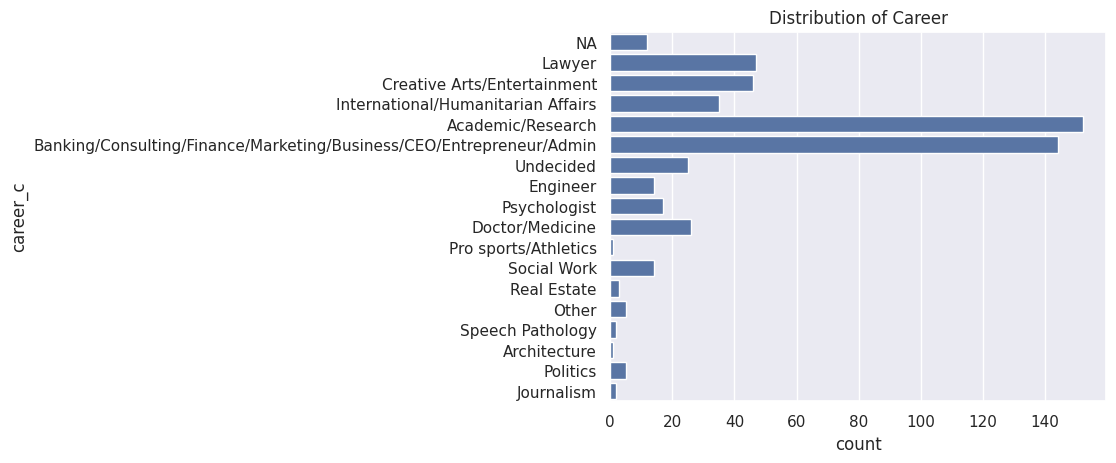

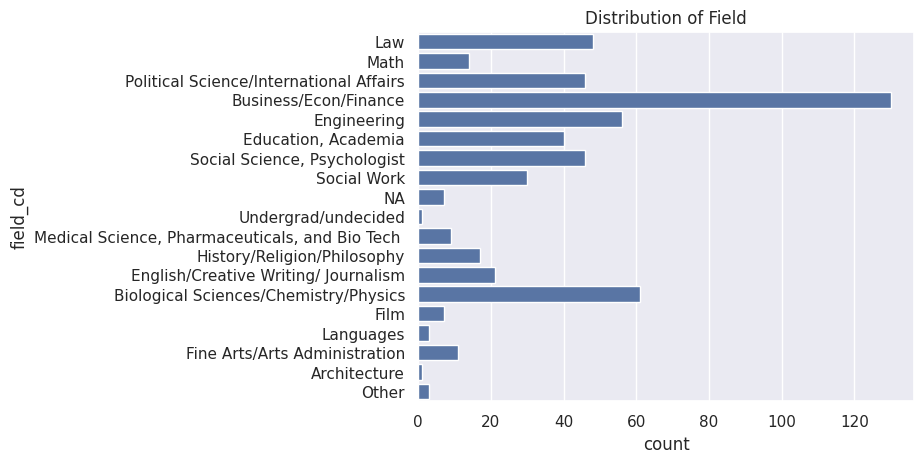

In [13]:
sns.set_theme()
ax = sns.countplot(data = EDA, y = 'career_c')
ax.set_title("Distribution of Career")
save_dir_name = '/content/drive/MyDrive/Colab_Notebooks/Thesis/EDA_image/'
save_path = f"{save_dir_name}DistributionofCareer.png"
plt.savefig(save_path, bbox_inches='tight')
plt.show()


sns.set_theme()
ax = sns.countplot(data = EDA, y = 'field_cd')
ax.set_title("Distribution of Field")
save_dir_name = '/content/drive/MyDrive/Colab_Notebooks/Thesis/EDA_image/'
save_path = f"{save_dir_name}DistributionofField.png"
plt.savefig(save_path, bbox_inches='tight')
plt.show()